<>:58: SyntaxWarning: invalid escape sequence '\d'
<>:58: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3430055447.py:58: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f"Bayesian Equilibrium: Actor's Decision\n($C_H={C_H}, C_L={C_L}, \delta={DELTA}$)", fontsize=14)


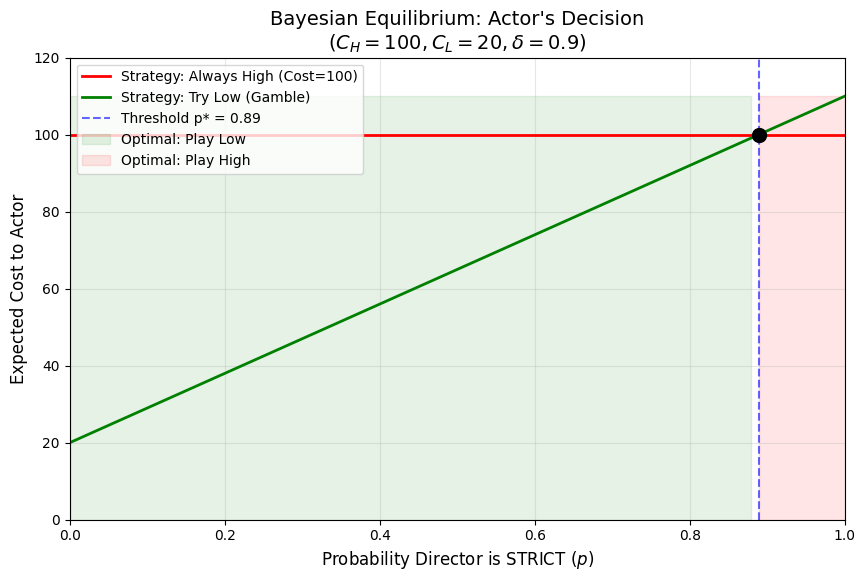

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def solve_bayesian_game(c_h, c_l, delta):
    """
    Solves the Bayesian Director-Actor game for a range of beliefs.
    """
    # 1. Create a range of beliefs (p) from 0 to 1
    # p is the probability the Director is STRICT
    p_values = np.linspace(0, 1, 100)

    # 2. Calculate Expected Cost for Strategy 1: Always High (Safe)
    # Cost is simply c_h regardless of p
    cost_safe = np.full_like(p_values, c_h)

    # 3. Calculate Expected Cost for Strategy 2: Try Low, Then High (Gamble)
    # Formula: (1-p)*c_l + p*(c_l + delta*c_h)
    # Simplified: c_l + p * delta * c_h
    cost_gamble = c_l + (p_values * delta * c_h)

    # 4. Find the Equilibrium Threshold (p*)
    # The intersection where Cost_Gamble == Cost_Safe
    # derived mathematically as: p < (c_h - c_l) / (delta * c_h)
    threshold_p = (c_h - c_l) / (delta * c_h)

    # cap threshold at 1.0 for plotting logic
    threshold_p = min(threshold_p, 1.0)

    return p_values, cost_safe, cost_gamble, threshold_p

# --- Parameters ---
C_H = 100      # Cost of High Effort
C_L = 20       # Cost of Low Effort
DELTA = 0.9    # Discount factor (Time value)

# --- Run Calculation ---
p, y_safe, y_gamble, p_star = solve_bayesian_game(C_H, C_L, DELTA)

# --- Visualization ---
plt.figure(figsize=(10, 6))

# Plot the two cost functions
plt.plot(p, y_safe, label=f"Strategy: Always High (Cost={C_H})", color='red', linewidth=2)
plt.plot(p, y_gamble, label="Strategy: Try Low (Gamble)", color='green', linewidth=2)

# Mark the Equilibrium Point
if 0 <= p_star <= 1:
    intersection_cost = C_L + (p_star * DELTA * C_H)
    plt.scatter(p_star, intersection_cost, color='black', s=100, zorder=5)
    plt.axvline(x=p_star, color='blue', linestyle='--', alpha=0.6, label=f"Threshold p* = {p_star:.2f}")

    # Shade the regions
    plt.fill_between(p, 0, max(C_H, C_L + DELTA*C_H), where=(p < p_star),
                     color='green', alpha=0.1, label="Optimal: Play Low")
    plt.fill_between(p, 0, max(C_H, C_L + DELTA*C_H), where=(p > p_star),
                     color='red', alpha=0.1, label="Optimal: Play High")

plt.title(f"Bayesian Equilibrium: Actor's Decision\n($C_H={C_H}, C_L={C_L}, \delta={DELTA}$)", fontsize=14)
plt.xlabel("Probability Director is STRICT ($p$)", fontsize=12)
plt.ylabel("Expected Cost to Actor", fontsize=12)
plt.legend(loc="upper left")
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, C_H + 20)

plt.show()